<a href="https://colab.research.google.com/github/armangupta910/Movie-Recommendor-System/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Imports**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

### **Get** **Data** **Set**

In [ ]:

# Replace the URL below with the raw URL of your CSV file
url = 'https://raw.githubusercontent.com/armangupta910/Movie-Recommendor-System/main/dataSet/complete_data%20-%20complete_data%20(1).csv.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
display(df.head())
print(df.shape[0])


userId  movieId  rating  timestamp_x             title  \
0       1        1     4.0    964982703  Toy Story (1995)   
1       5        1     4.0    847434962  Toy Story (1995)   
2       7        1     4.5   1106635946  Toy Story (1995)   
3      15        1     2.5   1510577970  Toy Story (1995)   
4      17        1     4.5   1305696483  Toy Story (1995)   

                                        genres  tag  timestamp_y  
0  Adventure|Animation|Children|Comedy|Fantasy  NaN          NaN  
1  Adventure|Animation|Children|Comedy|Fantasy  NaN          NaN  
2  Adventure|Animation|Children|Comedy|Fantasy  NaN          NaN  
3  Adventure|Animation|Children|Comedy|Fantasy  NaN          NaN  
4  Adventure|Animation|Children|Comedy|Fantasy  NaN          NaN

102677


### **Checking number of NaN's in the Data set**

<ipython-input-3-78449ada1f8f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data_percentage.index, y=missing_data_percentage.values, palette='viridis')


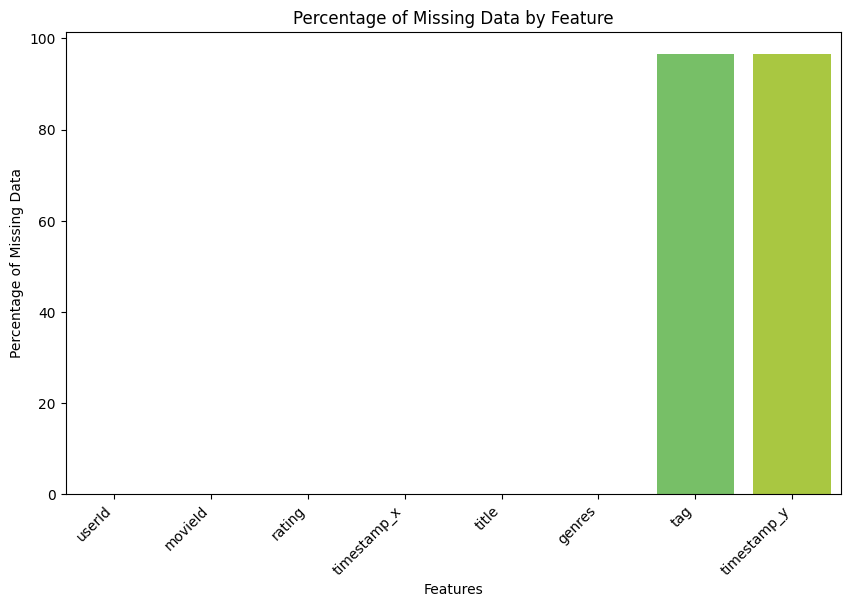

userId          0.000000
movieId         0.000000
rating          0.000000
timestamp_x     0.000000
title           0.000000
genres          0.000000
tag            96.614626
timestamp_y    96.614626
dtype: float64


In [ ]:
missing_data_percentage = df.isnull().sum() / len(df) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data_percentage.index, y=missing_data_percentage.values, palette='viridis')
plt.xticks(rotation=45, ha="right")
plt.title('Percentage of Missing Data by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Data')
plt.show()

# Display the percentage of missing values per column
print(missing_data_percentage)

### **Doing "No Tag" imputation of Tags Feature and dropping timestamp_y feature.**

In [ ]:
df = df.drop(columns=['timestamp_y'])

# Impute missing values in the 'tag' column with "No Tag"
df['tag'] = df['tag'].fillna('No Tag')

print(df.head())

   userId  movieId  rating  timestamp_x             title  \
0       1        1     4.0    964982703  Toy Story (1995)   
1       5        1     4.0    847434962  Toy Story (1995)   
2       7        1     4.5   1106635946  Toy Story (1995)   
3      15        1     2.5   1510577970  Toy Story (1995)   
4      17        1     4.5   1305696483  Toy Story (1995)   

                                        genres     tag  
0  Adventure|Animation|Children|Comedy|Fantasy  No Tag  
1  Adventure|Animation|Children|Comedy|Fantasy  No Tag  
2  Adventure|Animation|Children|Comedy|Fantasy  No Tag  
3  Adventure|Animation|Children|Comedy|Fantasy  No Tag  
4  Adventure|Animation|Children|Comedy|Fantasy  No Tag  


### **Renaming the timestamp_x feature to timestamp**

In [ ]:
df = df.rename(columns={'timestamp_x': 'timestamp'})

### **Again checking the missing values**

In [ ]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Display the number of missing values per column
print(missing_values)

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
tag          0
dtype: int64


### **Visualization**

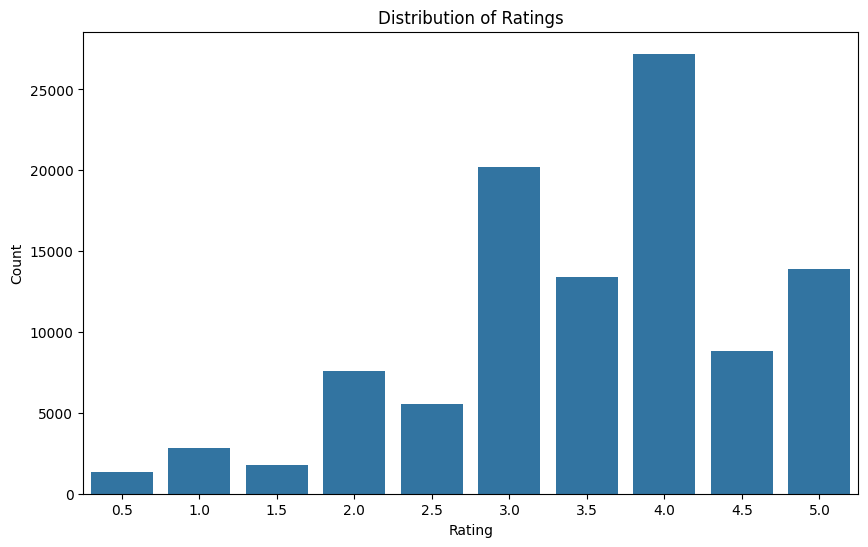

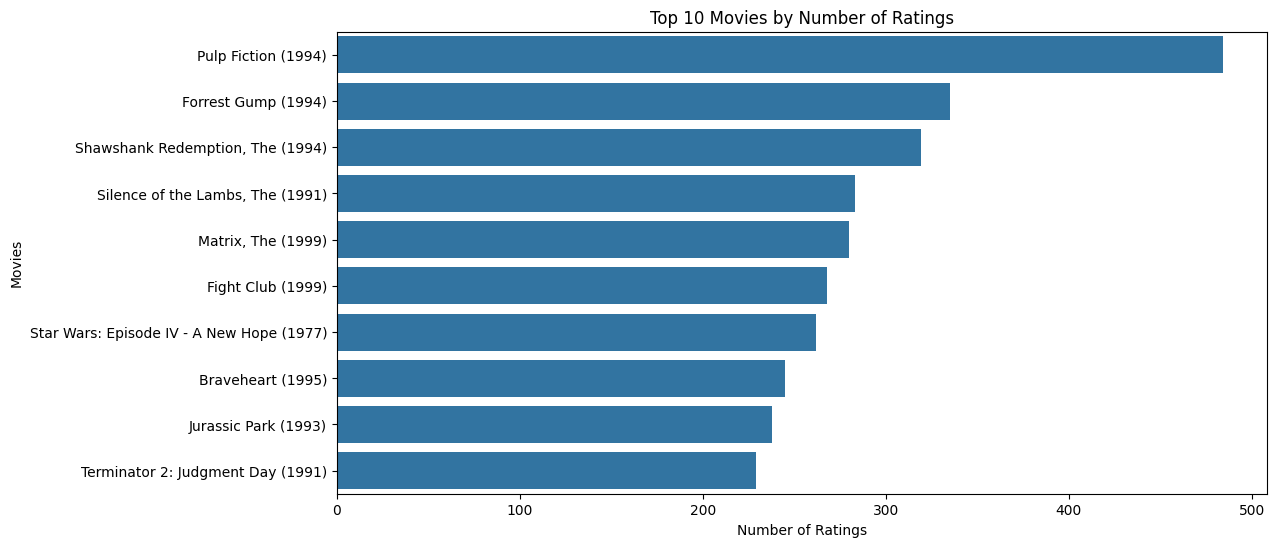

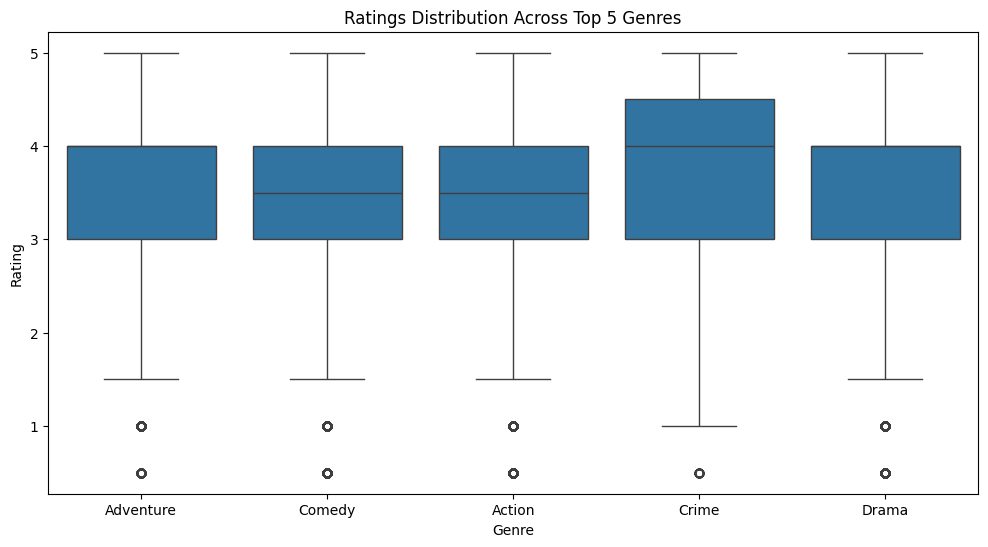

<ipython-input-7-96846f7bfc75>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_movies['average_rating'], y=top_rated_movies.index, palette='coolwarm')


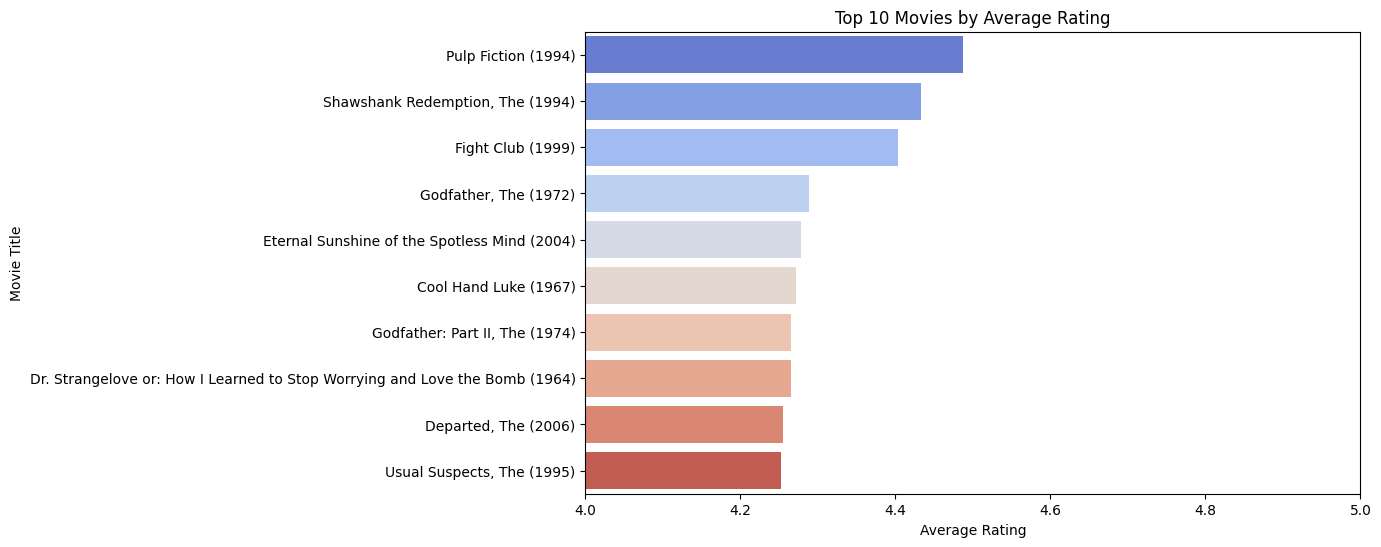

In [ ]:
# Visualization 1: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Visualization 2: Top 10 Movies by Number of Ratings
top_movies = df['title'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_movies, y=top_movies.index)
plt.title('Top 10 Movies by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Movies')
plt.show()

# Visualization 3: Ratings Distribution Across Top 5 Genres
# This requires a bit of preprocessing as 'genres' are pipe-separated
df['main_genre'] = df['genres'].apply(lambda x: x.split('|')[0])
top_genres = df['main_genre'].value_counts().head(5).index

plt.figure(figsize=(12, 6))
sns.boxplot(x='main_genre', y='rating', data=df[df['main_genre'].isin(top_genres)])
plt.title('Ratings Distribution Across Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

average_ratings = df.groupby('title')['rating'].mean()

# Calculate the number of ratings for each movie
ratings_count = df.groupby('title')['rating'].count()

# Creating a DataFrame for average ratings and rating counts
movie_ratings = pd.DataFrame({'average_rating': average_ratings, 'rating_count': ratings_count})

# Filter out movies with a low number of ratings to avoid bias
# For example, only consider movies with more than 50 ratings
movie_ratings = movie_ratings[movie_ratings['rating_count'] > 50]

# Sort movies by average rating
top_rated_movies = movie_ratings.sort_values(by='average_rating', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rated_movies['average_rating'], y=top_rated_movies.index, palette='coolwarm')
plt.title('Top 10 Movies by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.xlim(4, 5)  # Assuming the rating scale is 0.5 to 5
plt.show()




### **Splitting dataset in 80-20 split and applying Decision Tree Regressor**

In [ ]:
X = df[['userId', 'movieId']]  # Features
y = df['rating']  # Target variable

# Convert 'userId' and 'movieId' to categorical variables
X['userId'] = X['userId'].astype('category').cat.codes
X['movieId'] = X['movieId'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    y_true = [max(i, 1e-9) for i in y_true]  # Replacing 0 with a small value
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.2f}%")




<ipython-input-8-c4efd591ed1e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['userId'] = X['userId'].astype('category').cat.codes
<ipython-input-8-c4efd591ed1e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['movieId'] = X['movieId'].astype('category').cat.codes


MSE: 1.5699259836384885
RMSE: 1.2529668725223697
MAPE: 37.83%


In [ ]:
X.shape

(102677, 2)

In [ ]:
y.shape

(102677,)

### **Applying Linear Regression Model**

In [ ]:
## USING REGRESSION MODEL FOR THIS

model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("EVALUATION METRIX FOR REGRESSION MODEL:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

EVALUATION METRIX FOR REGRESSION MODEL:
Mean Squared Error (MSE): 1.5699259836384885
Root Mean Squared Error (RMSE): 1.0419960391124288
Mean Absolute Error (MAE): 0.8303720862300841
R-squared (R2): 0.0016084958556404905


### **PCA IMPLEMENTATION**

In [ ]:
class PCA:
  #constructor
  def __init__(self, n_components=None):
    self.n_components = n_components
    self.eigen_list_sorted = None
    self.eigen_list_ = None

  #centralize the data
  def Standard_Scaler(self, X):
    centralized_df = ((X - np.mean(X)) / (np.std(X)))
    return centralized_df

  #covariance matrix
  def cov(self, X, y):
    covariance = 0
    mean_X = np.mean(X)
    mean_y = np.mean(y)
    for index in range(X.shape[0]):
      covariance += ((X[index] - mean_X) * (y[index] - mean_y))
    covariance = covariance / len(X)

    return covariance

  def Covariance_Matrix(self, X):
    covariance_matrix_values = np.zeros((X.shape[1], X.shape[1]))
    for index_a in range(X.shape[1]):
      for index_b in range(X.shape[1]):
        if index_a == index_b:
          covariance_matrix_values[index_a][index_b] = np.var(X[:, index_a])
        else:
          covariance_matrix_values[index_a][index_b] = self.cov(X[:, index_a], X[:, index_b])

    return covariance_matrix_values

  #pca
  def QR_decomposition(self, X):

    Q = np.zeros(X.shape)
    R = np.zeros(X.shape)

    X_copy = [X[:, i].copy() for i in range(X.shape[1])]
    eigenvectors = [ ]
    print(X_copy)

    for u_vector in X_copy:
      for eigenvector in eigenvectors:
        u_vector = u_vector - float(np.matmul(u_vector, eigenvector)) * eigenvector

      u_norm = 0
      for u_value in u_vector:
        u_norm += u_value ** 2
      u_norm = u_norm ** 0.5

      u_vector_calculated = - u_vector / u_norm
      eigenvectors.append(u_vector_calculated)

    for column_index in range(X.shape[1]):
      Q[:, column_index] = eigenvectors[column_index].T

    for column_index_a in range(X.shape[1]):
      for column_index_b in range(X.shape[1]):
        if column_index_b >= column_index_a:
          R[column_index_a][column_index_b] = float(np.matmul(X_copy[column_index_b], eigenvectors[column_index_a]))

    return Q, R

  def eigenvector_eigenvalues(self, X, iterations = 10):

    eigenvalues = [ ]
    Q = np.zeros(X.shape)
    Q_list = [ ]
    R = np.zeros(X.shape)

    for iter in range(iterations):
      Q, R = self.QR_decomposition(X)
      if iter == 0:
        Q_list = Q
      else:
        Q_list = np.matmul(Q_list, Q)
      X = np.matmul(R, Q)

    for column_index in range(X.shape[1]):
      eigenvalues.append(X[column_index][column_index])

    eigenvectors = [Q_list[:, i].copy() for i in range(Q_list.shape[1])]

    return eigenvalues, eigenvectors

  def fit(self, X):
    X_copy = X.copy()

    # Normalize the data
    X_copy = self.Standard_Scaler(X_copy)

    covariance_matrix = self.Covariance_Matrix(X_copy)
    eigenvector, eigenvalues = self.eigenvector_eigenvalues(covariance_matrix)

    eigen_list = [ ]
    for index, value in enumerate(eigenvector):
        temp = [value, eigenvalues[index]]
        eigen_list.append(temp)

    self.eigen_list_ = eigen_list
    sorted(eigen_list, reverse=True)

    self.eigen_list_sorted = np.array([eigen_list[i][1] for i in range(self.n_components)])

    # Transform the data and return
    return self.transform(X)


  def transform(self, X):
    transformed_X = np.matmul(self.eigen_list_sorted, X.T).T
    return transformed_X



### **Testing model by applying linear regression classifier on PCA**

In [ ]:
# Your dataset
X = df[['userId', 'movieId']]  # Features
y = df['rating']  # Target variable

# Convert 'userId' and 'movieId' to categorical variables
X['userId'] = X['userId'].astype('category').cat.codes
X['movieId'] = X['movieId'].astype('category').cat.codes

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate PCA
pca = PCA(n_components=2)

# Fit PCA on training data and transform both training and testing data
X_train_pca = pca.fit(X_train.values)
X_test_pca = pca.transform(X_test.values)

# Instantiate Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train_pca, y_train)

# Predict ratings
y_pred = model.predict(X_test_pca)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    y_true = [max(i, 1e-9) for i in y_true]  # Replacing 0 with a small value
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.2f}%")


<ipython-input-28-3e41cf72321f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['userId'] = X['userId'].astype('category').cat.codes
<ipython-input-28-3e41cf72321f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['movieId'] = X['movieId'].astype('category').cat.codes


[array([0.00615666, 0.00252028]), array([0.00252028, 1.2781797 ])]
[array([0.19048881, 0.44777534]), array([0.44777534, 1.09384755])]
[array([1.27801086, 0.01486912]), array([0.01486912, 0.0063255 ])]
[array([1.27818469e+00, 7.15720863e-05]), array([7.15720863e-05, 6.15166798e-03])]
[array([1.27818470e+00, 3.44463071e-07]), array([3.44463074e-07, 6.15166395e-03])]
[array([1.27818470e+00, 1.65783635e-09]), array([1.65783994e-09, 6.15166395e-03])]
[array([1.27818470e+00, 7.97885641e-12]), array([7.98243892e-12, 6.15166395e-03])]
[array([1.27818470e+00, 3.84007441e-14]), array([4.19832593e-14, 6.15166395e-03])]
[array([1.27818470e+00, 1.84815601e-16]), array([3.76733082e-15, 6.15166395e-03])]
[array([1.27818470e+00, 8.89482934e-19]), array([3.58340471e-15, 6.15166395e-03])]
MSE: 1.08575574552599
RMSE: 1.0419960391124288
MAPE: 37.56%


### **Plottting a graph for explained variance ratio vs n_components to determine at which n_component we have maximum cuumulative explained variance ratio**

In [ ]:
def explained_variance_ratio(eigenvalues):
    total_variance = np.sum(eigenvalues)
    return eigenvalues / total_variance


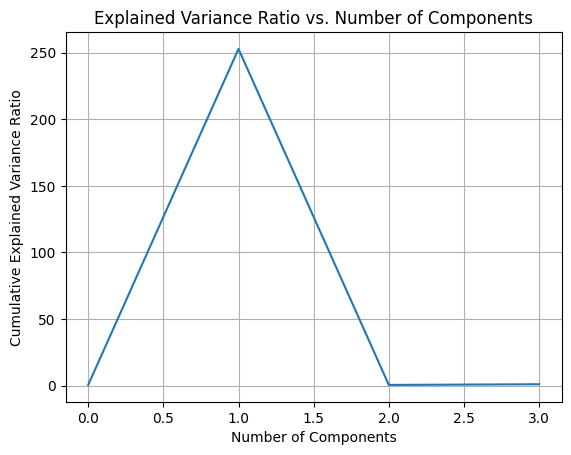

In [ ]:
# Extract eigenvalues
eigenvalues = np.array([eig[1] for eig in pca.eigen_list_])

# Calculate explained variance ratio
explained_var_ratio = explained_variance_ratio(eigenvalues)

# Plot the explained variance ratio
plt.plot(np.cumsum(explained_var_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
X_train_pca

array([[6298.85346767, -424.52089793],
       [3617.84684208, -423.83278222],
       [ 509.12778562,  -63.99138935],
       ...,
       [2455.93233754, -468.1349735 ],
       [  90.19256953, -601.82248247],
       [2524.18779212, -596.99999172]])

### **Visualization of datapoints in 2D**

In [ ]:
import plotly.express as px

y_train_str = y_train.astype(str)
fig = px.scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], color=y_train_str, color_discrete_sequence=px.colors.qualitative.G10)

fig.show()


### **Visualization of datapoints in 3D**

In [ ]:
import plotly.express as px

y_train_str = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_pca[:, 0], y=X_train_pca[:, 1], z=np.zeros_like(X_train_pca[:, 0]), color=y_train_str)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()


In [ ]:
# using the modified dataset
